# Deep Learning with Keras

Let's apply deep learning to the same binary classification problem we explored in the machine learning section.

First, we'll generate our data set in the same manner as we did before...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
n_samples = 10000


In [3]:
centers = [(0.9, 0.05), (0.05, 0.94), (0.3, 0.6), (0.8, 0.8)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.2,
                  centers=centers, shuffle=False, random_state=42)

# Then filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(X, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# And convert the results back into numpy arrays:
X = np.array(features)
y = np.array(labels)

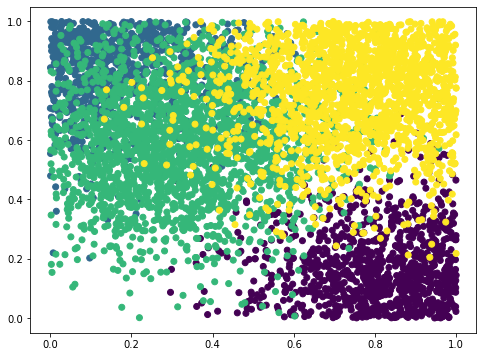

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float64))
plt.show()

In [5]:
y.shape
y = keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=2)
print('\nTest loss:{}%\n' .format(round(scores[0]*100,2)))
print('Test accuracy:{}%'.format(round(scores[1]*100,2)))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                96        
                                                                 
 dense_13 (Dense)            (None, 4)                 132       
                                                                 
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
49/49 [==============================] - 0s 3ms/step - loss: 1.3650 - accuracy: 0.4081 - val_loss: 1.3003 - val_accuracy: 0.6249
Epoch 2/10
49/49 [==============================] - 0s 1ms/step - loss: 1.2477 - accuracy: 0.6872 - val_loss: 1.2024 - val_accuracy: 0.6797
Epoch 3/10
49/49 [==============================] - 0s 1ms/step - loss: 1.1555 - accuracy: 0.6995 - val_loss: 1.1186 - val_accuracy: 0.6880
Epoch 4/10
49/49 [=========